# Geocode Analysis

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
with open('../Dataset/card.json') as data_file:
    card_data = json.load(data_file)

In [3]:
address = []
for data in card_data:
    address.append(data['trans_branch']['address'])

## Google Map Geocoding API

In [4]:
import requests

In [5]:
api_key = "blablabla"
url = "https://maps.googleapis.com/maps/api/geocode/json"

In [6]:
geocode = []
for addr in address:
    params = {'address': addr, '+CA&key': api_key}
    res = requests.get(url, params=params).json()
    if res['status'] == 'OK':
        lat = res['results'][0]['geometry']['location']['lat']
        lng = res['results'][0]['geometry']['location']['lng']
        geocode.append((lat, lng))

In [7]:
geocode = np.array(geocode, dtype=np.float32)

## Geocode Analysis with Convex Hull

In [8]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
hull = ConvexHull(geocode)

In [10]:
print("Area is {0:.2f}".format(hull.area))
print("Volume is {0:.2f}".format(hull.volume))

Area is 0.76
Volume is 0.02


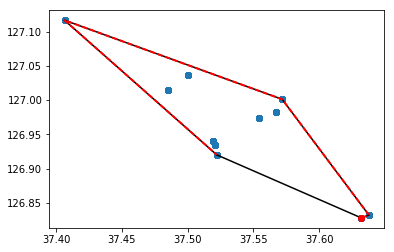

In [11]:
plt.plot(geocode[:,0], geocode[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(geocode[simplex, 0], geocode[simplex, 1], 'k-')

plt.plot(geocode[hull.vertices,0], geocode[hull.vertices,1], 'r--', lw=2)
plt.plot(geocode[hull.vertices[0],0], geocode[hull.vertices[0],1], 'ro')
plt.show()

## Geocode Analysis with Clustering

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
km = KMeans(n_clusters=1, random_state=0).fit(geocode)
print("Cluster inertia is {0:.3f}".format(km.inertia_))

Cluster inertia is 2.511
